In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout

In [10]:
train_path = "E:\\Img_datasets\\Avengers\\train"
test_path = "E:\\Img_datasets\\Avengers\\test"

#### Creating dataframe with imgs and Labels - method 1

In [11]:
train_img = glob.glob(train_path+"\\*\\*.png")
test_img = glob.glob(test_path+"\\*\\*.png")
print(len(train_img))
print(len(test_img))

274
60


In [26]:
print(type(train_img))
train_img[0]

<class 'list'>


'E:\\Img_datasets\\Avengers\\train\\chris_evans\\chris_evans1.png'

In [25]:
x = "E:\\Img_datasets\\Avengers\\train\\chris_evans\\chris_evans1.png"
r1 = os.path.split(x)[0]
r1
r2 = os.path.split(r1)[1]
r2

'chris_evans'

In [12]:
train_labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],train_img))
test_labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],test_img))
print(len(train_labels))
print(len(test_labels))

274
60


#### Data Augmentation

In [17]:
categories = os.listdir(train_path)
labels = [i for i in range(len(categories))]
print(categories,labels)

['chris_evans', 'chris_hemsworth', 'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson'] [0, 1, 2, 3, 4]


In [19]:
label_dict = dict(zip(categories,labels))
print(label_dict)

{'chris_evans': 0, 'chris_hemsworth': 1, 'mark_ruffalo': 2, 'robert_downey_jr': 3, 'scarlett_johansson': 4}


In [15]:
BATCH_SIZE = 32
IMG_SHAPE = (250,250)

print(f"Batch Size: {BATCH_SIZE}")
print(f"Image Shape: {IMG_SHAPE}")

Batch Size: 32
Image Shape: (250, 250)


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen = ImageDataGenerator(rescale=1.0/255,width_shift_range=0.25, height_shift_range=0.25,
                                  vertical_flip=True,horizontal_flip=True,zoom_range=0.2,
                                  rotation_range=20)

train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                   target_size = IMG_SHAPE,
                                                   batch_size = BATCH_SIZE,
                                                   class_mode = 'categorical',
                                                   subset='training')

Found 274 images belonging to 5 classes.


In [31]:
print(type(train_generator))
# print(train_generator[0])
print(train_generator[0][0].shape)
print(train_generator[0][1].shape)
print(train_generator[1][0].shape)
print(train_generator[1][1].shape)

<class 'keras.preprocessing.image.DirectoryIterator'>
(32, 250, 250, 3)
(32, 5)
(32, 250, 250, 3)
(32, 5)


In [32]:
print(32*8 +18)

274


In [33]:
for i in range(9):
    print(train_generator[i][0].shape)

(32, 250, 250, 3)
(32, 250, 250, 3)
(32, 250, 250, 3)
(32, 250, 250, 3)
(32, 250, 250, 3)
(32, 250, 250, 3)
(32, 250, 250, 3)
(32, 250, 250, 3)
(18, 250, 250, 3)


In [34]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(directory=test_path,
                                                   target_size = IMG_SHAPE,
                                                   batch_size = BATCH_SIZE,
                                                   class_mode = 'categorical',
                                                   subset='training')

Found 60 images belonging to 5 classes.


In [38]:
for i in range(2):
    print(test_generator[i][0].shape)

(32, 250, 250, 3)
(28, 250, 250, 3)


#### Plotting Train data

In [42]:
print(train_generator.class_indices)
print(train_generator.class_indices.items())

{'chris_evans': 0, 'chris_hemsworth': 1, 'mark_ruffalo': 2, 'robert_downey_jr': 3, 'scarlett_johansson': 4}
dict_items([('chris_evans', 0), ('chris_hemsworth', 1), ('mark_ruffalo', 2), ('robert_downey_jr', 3), ('scarlett_johansson', 4)])


In [43]:
labels = {value: key for key, value in train_generator.class_indices.items()}
print(labels)

{0: 'chris_evans', 1: 'chris_hemsworth', 2: 'mark_ruffalo', 3: 'robert_downey_jr', 4: 'scarlett_johansson'}


In [45]:
print(train_generator[0][1])
cat_b1 = [np.argmax(i) for i in train_generator[0][1]]
print(cat_b1)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[1, 3, 2, 1, 3, 4, 2, 0, 1, 1, 2, 4, 3, 2, 4, 0, 1, 2, 4, 2, 1, 4, 0, 1, 3, 2, 1, 2, 0, 4, 3, 2]


In [48]:
print(labels)
print(labels[cat_b1[3]])

{0: 'chris_evans', 1: 'chris_hemsworth', 2: 'mark_ruffalo', 3: 'robert_downey_jr', 4: 'scarlett_johansson'}
chris_hemsworth


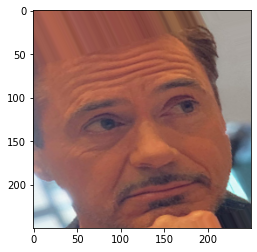

In [49]:
plt.imshow(train_generator[0][0][4])
plt.show()

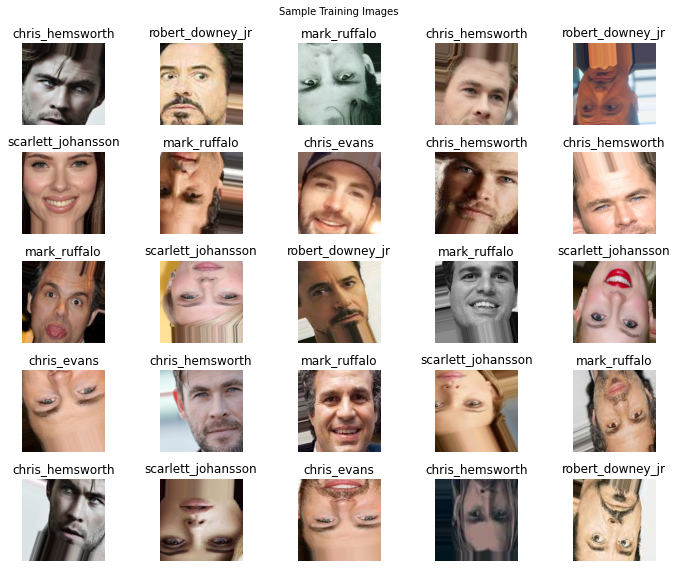

In [50]:
fig, ax = plt.subplots(5, 5, figsize = (10, 8))
idx = 0
plt.suptitle("Sample Training Images", fontsize = 10)
for i in range(5):     # i = 0,1,2,3
    for j in range(5): # j =0,1,2,3
        label = labels[cat_b1[idx]]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.show()

#### Building CNN Architecture

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout,Conv2D, MaxPooling2D

In [58]:
print(train_generator.image_shape)

(250, 250, 3)


In [60]:
# train_generator[0][1]

In [61]:
m1 = Sequential()
m1.add(Conv2D(64,(3, 3), activation = 'relu', input_shape = train_generator.image_shape))
m1.add(MaxPooling2D(pool_size = (2, 2)))

m1.add(Conv2D(64, (3, 3), activation = 'relu'))
m1.add(MaxPooling2D(pool_size = (2, 2)))

m1.add(Flatten())

m1.add(Dense(32, activation = 'relu'))
m1.add(Dense(16, activation = 'relu'))

m1.add(Dense(units=5, activation = 'softmax'))

m1.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
es = EarlyStopping(monitor='val_loss',patience=3)

In [66]:
h1 = m1.fit(train_generator,epochs=10,validation_data=test_generator,callbacks=[es])

Epoch 1/10
9/9 [==============================] - 49s 5s/step - loss: 2.8379 - accuracy: 0.2007 - val_loss: 1.6155 - val_accuracy: 0.2000
Epoch 2/10
9/9 [==============================] - 47s 5s/step - loss: 1.6178 - accuracy: 0.2117 - val_loss: 1.6056 - val_accuracy: 0.2667
Epoch 3/10
9/9 [==============================] - 46s 5s/step - loss: 1.6064 - accuracy: 0.2080 - val_loss: 1.6054 - val_accuracy: 0.2000
Epoch 4/10
9/9 [==============================] - 50s 5s/step - loss: 1.6137 - accuracy: 0.2153 - val_loss: 1.5814 - val_accuracy: 0.3000
Epoch 5/10
9/9 [==============================] - 55s 6s/step - loss: 1.5953 - accuracy: 0.2555 - val_loss: 1.5656 - val_accuracy: 0.3000
Epoch 6/10
9/9 [==============================] - 56s 6s/step - loss: 1.6270 - accuracy: 0.2737 - val_loss: 1.5675 - val_accuracy: 0.2333
Epoch 7/10
9/9 [==============================] - 58s 6s/step - loss: 1.5914 - accuracy: 0.2445 - val_loss: 1.5934 - val_accuracy: 0.2667
Epoch 8/10
9/9 [==================